In [2]:
import os

# Scientific libraries
import numpy as np
import pandas as pd

# Visual Analysis libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Visual Analysis setup
from matplotlib import rcParams
rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False
plt.style.use('fivethirtyeight')
custom_colors = ['#74a09e','#86c1b2','#98e2c6','#f3c969','#f2a553', '#d96548', '#c14953']
sns.set_palette(custom_colors)
%config InlineBackend.figure_format = "retina"

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

print(os.listdir('./data'))

['heart.csv']


In [3]:
df = pd.read_csv('./data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**What the columns describe:**
- age: age in years
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mmHg on admission to the hospital)
- chol: serum cholesterol in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl)(1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: have disease or not (1=yes, 0=no)

In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

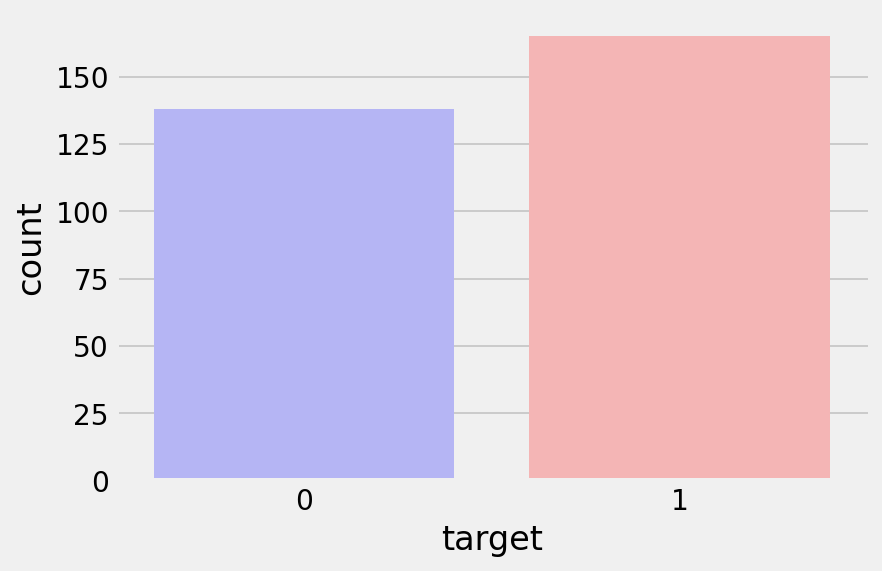

In [5]:
sns.countplot(x='target', data=df, palette='bwr');

In [6]:
noDiseaseCount = len(df[df.target == 0])
diseaseCount = len(df[df.target == 1])

print("Percentage of patients without heart disease: {:.2f}%".format((noDiseaseCount / (len(df.target))*100)))
print("Percentage of patients with heart disease: {:.2f}%".format((diseaseCount / (len(df.target))*100)))

Percentage of patients without heart disease: 45.54%
Percentage of patients with heart disease: 54.46%


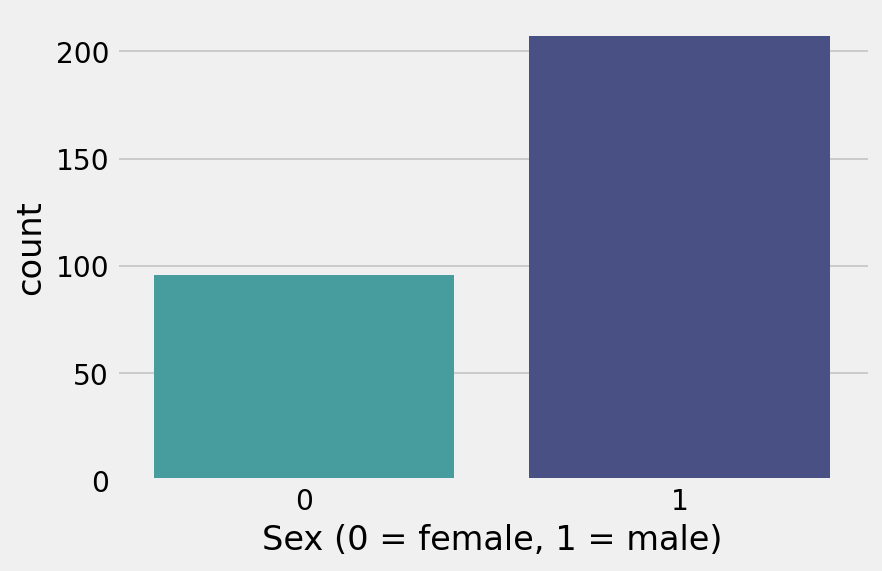

In [7]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel('Sex (0 = female, 1 = male)')
plt.show();

In [8]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])

print('Percentage of female patients: {:.2f}%'.format((countFemale / (len(df.sex))*100)))
print('Percentage of male patients: {:.2f}%'.format((countMale / (len(df.sex))*100)))

Percentage of female patients: 31.68%
Percentage of male patients: 68.32%


In [9]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


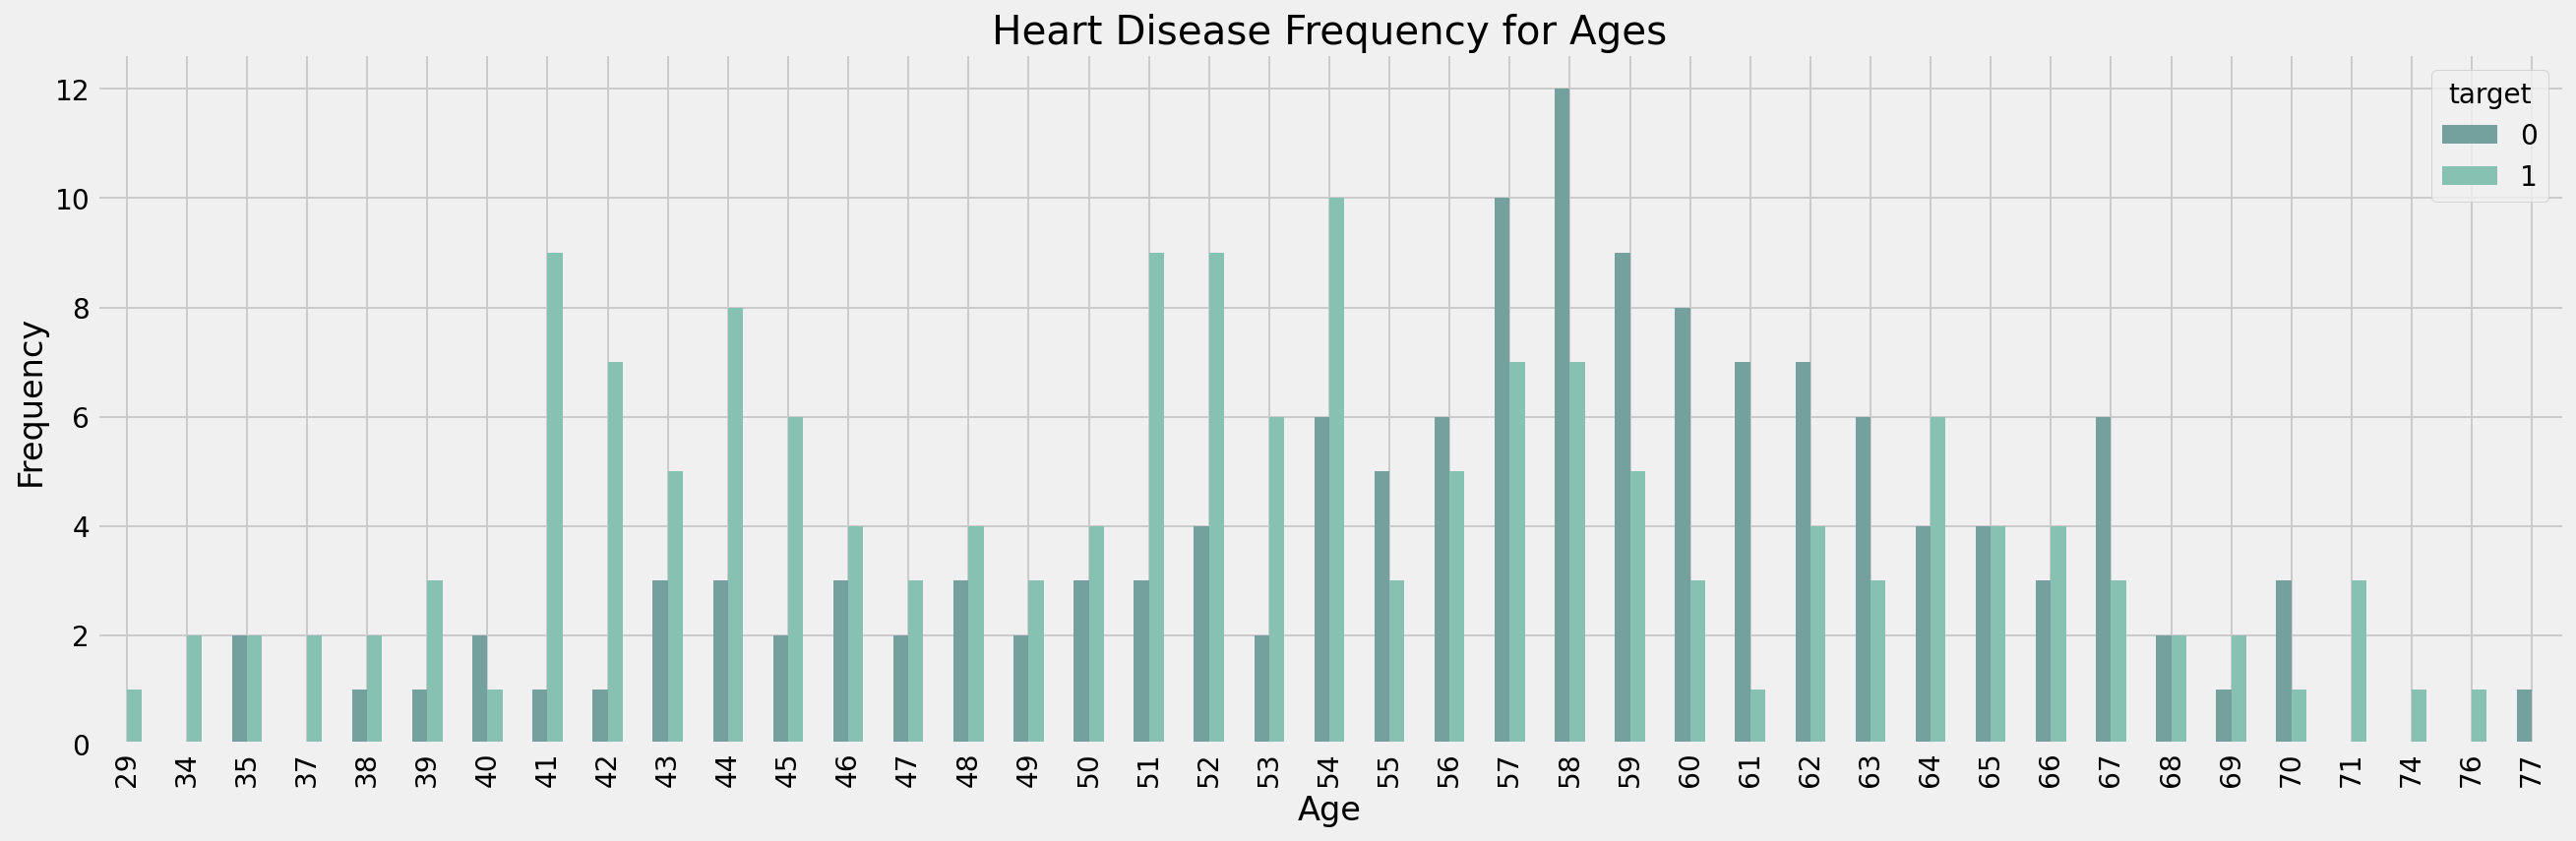

In [10]:
pd.crosstab(df.age, df.target).plot(kind="bar", figsize=(20, 6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show();

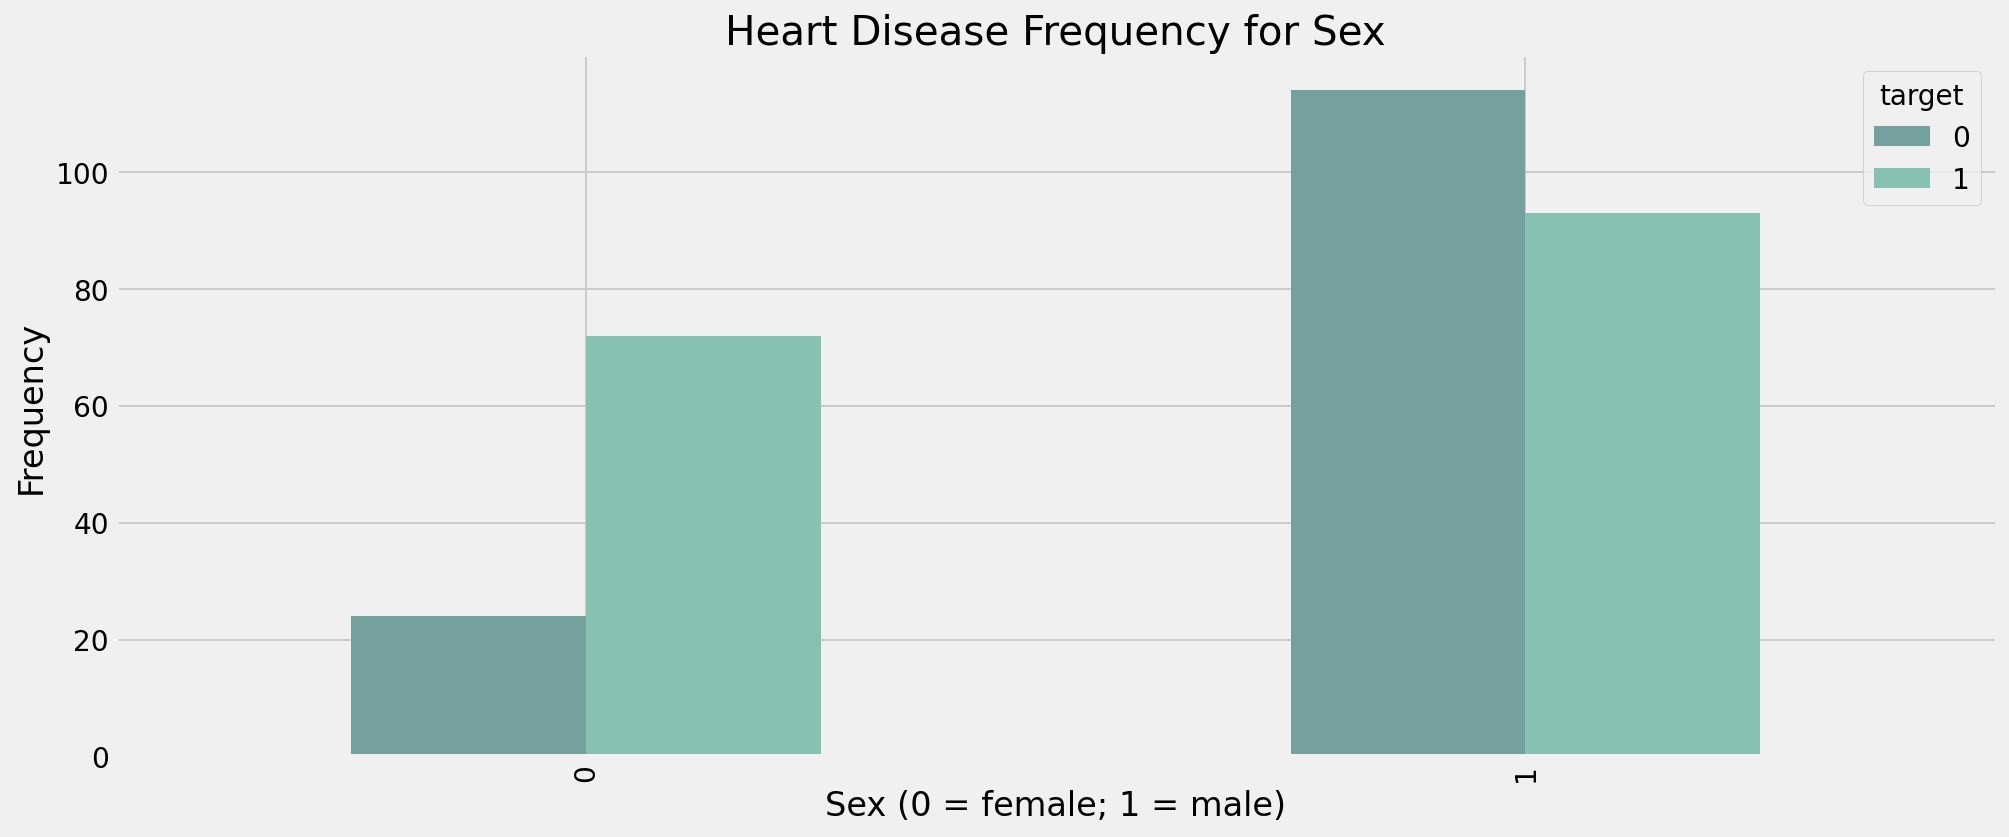

In [11]:
pd.crosstab(df.sex, df.target).plot(kind="bar", figsize=(15, 6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = female; 1 = male)')
plt.ylabel('Frequency')
plt.show();

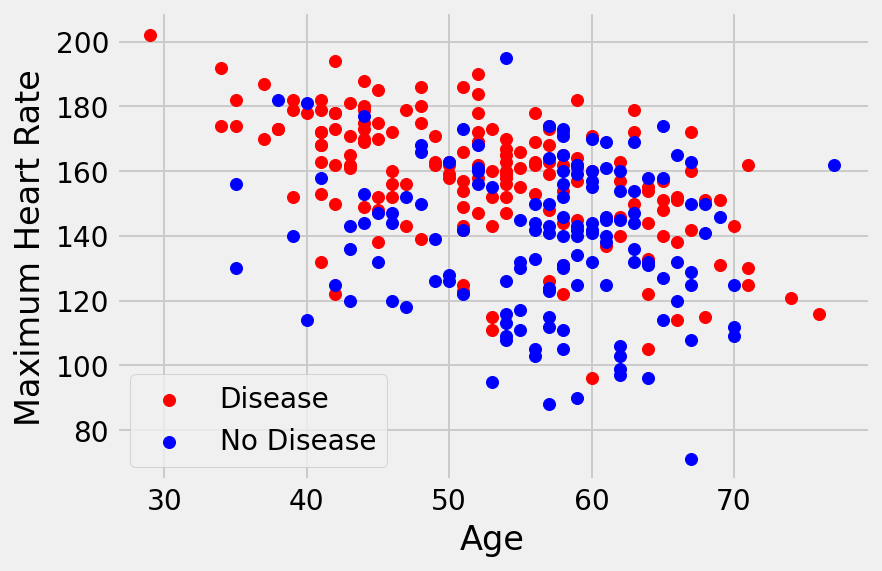

In [12]:
plt.scatter(x=df.age[df.target == 1], y=df.thalach[(df.target == 1)], c='red')
plt.scatter(x=df.age[df.target == 0], y=df.thalach[(df.target == 0)], c='blue')

plt.legend(['Disease', 'No Disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show();

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [16]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [17]:
df.slope.value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

The above variables are categorical variables. In order to run the datasets through a machine learning model we need to convert them into nunerical variables. We can do this in multiple ways, one is by one-hot encoding the variables. Another way is by using pandas get_dummies method.

In [18]:
a = pd.get_dummies(df['cp'], prefix="cp")
b = pd.get_dummies(df['thal'], prefix="thal")
c = pd.get_dummies(df['slope'], prefix="slope")

In [19]:
frames = [df, a, b, c]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [20]:
df = df.drop(columns=['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


Now that we have all of the columns in numerical form we can run the data through a machine learning model.

We'll first create a model for Logistic Regression.

We'll try creating our own functions first to get a feel of how everything works under the hood.

First we will normalize the data using a technique called Min-Max feature scaling. What this technique does is bring all values to a range between 0 and 1. The following image shows how we will perform this feature scaling technique.

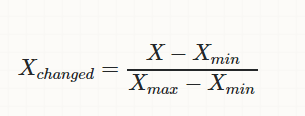

In [21]:
from IPython.display import Image
Image(filename='normalization.png')

In [22]:
y = df.target.values
X = df.drop("target", axis=1)

In [23]:
# Normalize
X_normal = (X - np.min(X)) / (np.max(X) - np.min(X)).values

Now we'll split our data into our training and test sets. 80% will be training, and 20% will be test data.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [25]:
# Transpose matrices
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

In [26]:
# We'll initialize weights and a bias for training/updating the results
def initialize(dimension):
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight, bias

We'll define a sigmoid function next.

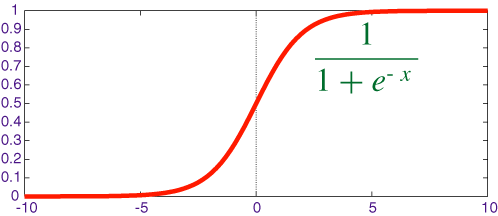

In [27]:
Image(filename='sigmoid-function.png')

In [28]:
def sigmoid(z):
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

In [29]:
def forwardBackward(weight, bias, X_train, y_train):
    # Forward
    
    y_hat = sigmoid(np.dot(weight.T, X_train) + bias)
    loss = -(y_train*np.log(y_hat) + (1-y_train)*np.log(1-y_hat))
    cost = np.sum(loss) / X_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(X_train,((y_hat-y_train).T))/X_train.shape[1]
    derivative_bias = np.sum(y_hat-y_train)/X_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [30]:
def update(weight, bias, X_train, y_train, learningRate, iteration):
    costList = []
    index = []
    
    # For each iteration, update weight and bias values
    for i in range(iteration):
        cost, gradients = forwardBackward(weight, bias, X_train, y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)
        
    parameters = {"weight": weight, 
                 "bias": bias}
    
    print("Iteration:", iteration)
    print("Cost:", cost)
    
    plt.plot(index, costList)
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost")
    plt.show();
    
    return parameters, gradients

In [31]:
def predict(weight, bias, X_test):
    z = np.dot(weight.T, X_test) + bias
    y_hat = sigmoid(z)
    
    y_prediction = np.zeros((1, X_test.shape[1]))
    
    for i in range(y_hat.shape[1]):
        if y_hat[0, i] <= 0.5:
            y_prediction[0, i] = 0
        else:
            y_prediction[0, i] = 1
    return y_prediction

In [32]:
def logistic_regression(X_train, y_train, X_test, y_test, learningRate, iteration):
    dimension = X_train.shape[0]
    weight, bias = initialize(dimension)
    
    parameters, gradients = update(weight, bias, X_train, y_train, learningRate, iteration)
    
    y_predictions = predict(parameters["weight"], parameters["bias"], X_test)
    
    print("Manual Test Accuracy: {:.2f}%".format((100 - np.mean(np.abs(y_predictions - y_test))*100)))
    

Iteration: 100
Cost: 0.36732524330532035


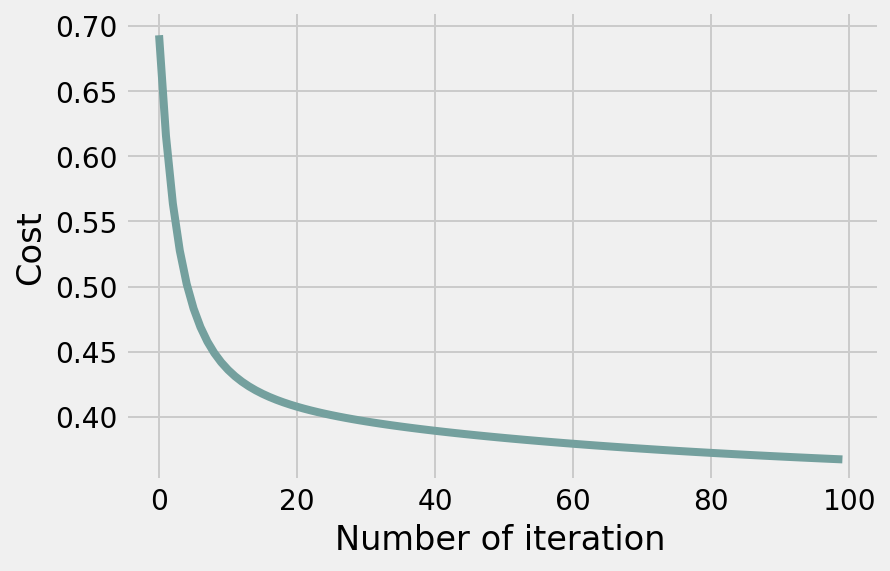

Manual Test Accuracy: 88.52%


In [33]:
logistic_regression(X_train, y_train, X_test, y_test, 1, 100)

Now we will find out what scikit-learn's accuracy is using their models.

In [34]:
accuracies = {}

log_reg = LogisticRegression()
log_reg.fit(X_train.T, y_train.T)
acc = log_reg.score(X_test.T, y_test.T)*100

accuracies['Logistic Regression'] = acc
print('Test Accuracy: {:.2f}%'.format(acc))

Test Accuracy: 86.89%


As we can see, our manually implemented model works better than the Scikit-learn method!

Let's experiment with a K-Nearest Neighbour (KNN) Classification algorithm.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train.T, y_train.T)
prediction = knn.predict(X_test.T)

print('{}NN Score: {:.2f}%'.format(2, knn.score(X_test.T, y_test.T)*100))

2NN Score: 72.13%


Let's see if we can find an optimal K for the n_neighbors hyperparameter.

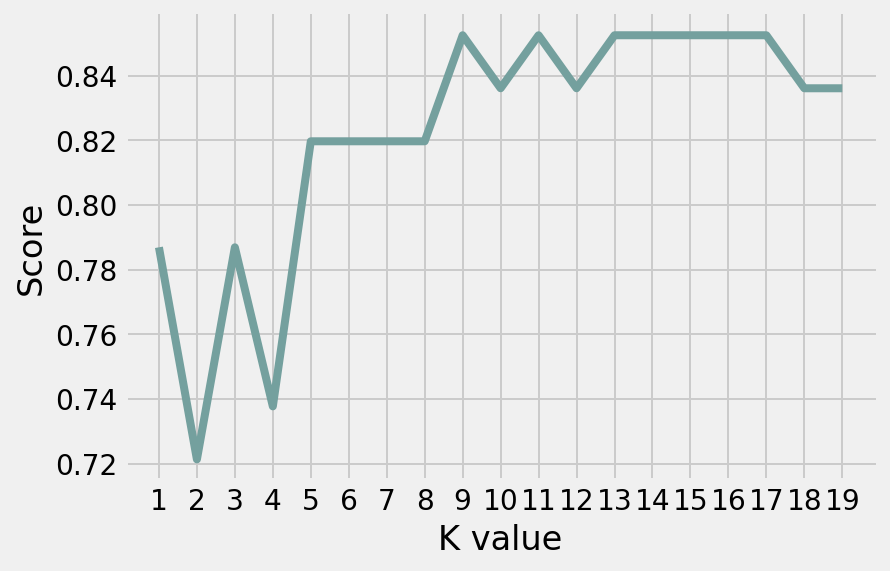

Maximum KNN Score is 85.25%


In [36]:
scoreList = []
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train.T, y_train.T)
    scoreList.append(knn2.score(X_test.T, y_test.T))
    
plt.plot(range(1, 20), scoreList)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show();

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

If we define K as 9, 11, and 13 through 17, we will reach a maximum score.

Next, we will look at Support Vector Machines.

In [38]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train.T, y_train.T)

acc = svm_clf.score(X_test.T, y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Classification Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Classification Algorithm: 86.89%


Naive Bayes Algorithm

In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train.T, y_train.T)

acc = nb.score(X_test.T, y_test.T)*100
accuracies["Naive Bayes"] = acc
print("Test Accuracy of Naive Bayes Algorithm: {:.2f}".format(acc))

Test Accuracy of Naive Bayes Algorithm: 60.66


Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train.T, y_train.T)

acc = tree_clf.score(X_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc
print("Test Accuracy of Decision Tree Classifier: {:.2f}%".format(acc))

Test Accuracy of Decision Tree Classifier: 77.05%
